# WS 3 Solution 📊

:::{epigraph}
Visualization and the bootstrap

-- TODO your name here
:::

:::{admonition} Collaboration Statement
:::

# Learning Objectives

- Become familiar with `seaborn` and `matplotlib` for visualizing data
- Learn to use `ipywidgets` for creating interactive plots
- Develop an intuition for bootstrap sampling
- Read and reflect on a real-world case study using the causal roadmap

# 1. Seaborn and Matplotlib [1.5 pts]

[matplotlib](https://matplotlib.org/stable/users/explain/quick_start.html#quick-start) and [seaborn](https://seaborn.pydata.org/tutorial/introduction.html) are two of the most popular libraries for creating visualizations in Python, with seaborn being a higher-level library built on top of matplotlib. We'll use seaborn whenever possible, but to have the greatest degree of contol over your visualizations, it is important to also understand the fundamentals of matplotlib.

We'll explore both libraries in this worksheet through an exploration of the [Gapminder](https://www.gapminder.org/) dataset of GDP and life expectancy across countries.

The following official resources are good starting references for both libraries:

- [matplotlib quick start](https://matplotlib.org/stable/users/explain/quick_start.html#quick-start)
- [seaborn plotting overview](https://seaborn.pydata.org/tutorial/function_overview.html)
- [seaborn data structures](https://seaborn.pydata.org/tutorial/data_structure.html)

:::{admonition} Reading notes
:class: note

- If you are new to matplotlib, I would suggest reading "A simple example," "Parts of a figure," and "Coding style" sections of the matplotlib quickstart, trying out the code examples in a cell below, and using the rest of the guide as reference for when you need to customize your plots.
    - In particular, the "Coding style" section is useful for understanding matplotlib examples that differ based on whether they are using the "object-oriented" or "pyplot" approach.

- From the seaborn plotting overview, we will primarily be using axes-level functions as opposed to the figure-level functions in order for more seamless integration with the matplotlib API.
    - Also note that the seaborn axes-level function examples use the object-oriented approach to matplotlib where figure `f` and axes `axs` objects are explicitly created.

- From the seaborn data structures reference: the data we will be working with in the course will primarily be in the "long" format, where each variable is a column and each observation is a row. Thus we'll frequently be using the `data`, `x`, `y`, and `hue` parameters in our seaborn functions.

:::

First let's import both seaborn and matplotlib using their standard import idioms along with pandas and numpy:

In [2]:
import pandas as pd
import numpy as np

# standard import aliases for seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt



Next, we'll load in the gapminder dataset of GDP and life expectancy across countries. Below are dsecriptions of the columns in the dataset:

- `country` - The country
- `continent` - The continent the country is in
- `year` - The year data was collected. Ranges from 1952 to 2007 in increments of 5 years
- `lifeExp` - Life expectancy at birth, in years
- `pop` - Population
- `gdpPercap` - GDP per capita (US$, inflation-adjusted)

In [3]:
# load the gapminder dataset and peek at its columns
gapminder_df = pd.read_csv("~/COMSC-341CD/data/gapminder.csv")
gapminder_df.head(5)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


**1.1.** Provide examples of a **descriptive** and **causal** question that could be asked with the variables in the dataset.

**Your Response**: 
Descriptive question: How has the life expectancy in Asia changed over time?
Causal Question: Does an increase in gdp per capita lead to lower population growth?


:::{note} 

The gapminder dataset is an example where we have multiple observations per sample over time, as opposed to having a single observation per sample. We'll learn about causal study designs that can be used to handle time series data in the second half of the course.

:::

Seaborn has tight integration with pandas, which allows us to use pandas to filter and manipulate the data before passing it to seaborn. Let's generate a [sns.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot) of GDP per capita vs. life expectancy in the year 2007.

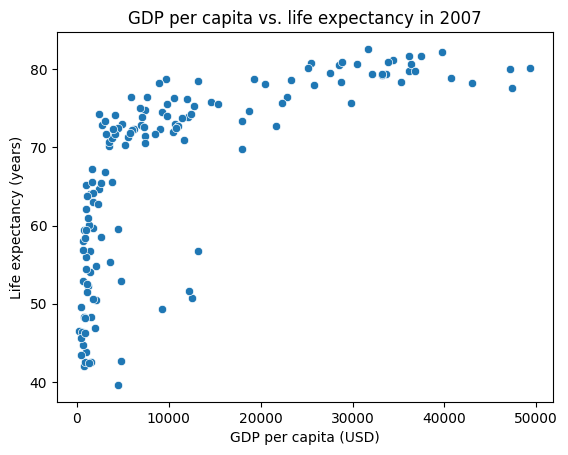

In [4]:
# select out the data for the year 2007
gapminder_2007_df = gapminder_df[gapminder_df['year'] == 2007]

# Notice how we can use the `data` parameter to pass in the dataframe, and the `x` and `y` parameters to specify the columns to plot.
sns.scatterplot(data=gapminder_2007_df, x="gdpPercap", y="lifeExp")
plt.title("GDP per capita vs. life expectancy in 2007")
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life expectancy (years)")
plt.show()

:::{note}
Be sure to follow the basics of good figure design when creating your plots, which includes having a title, axis labels with units, and a legend. 
:::

Additionally, many seaborn plots take a `hue` parameter, which allows us to group the plots by a column in our dataframe and color them differently -- this is analogous to the `groupby` operation in pandas. Let's color the points by continent.


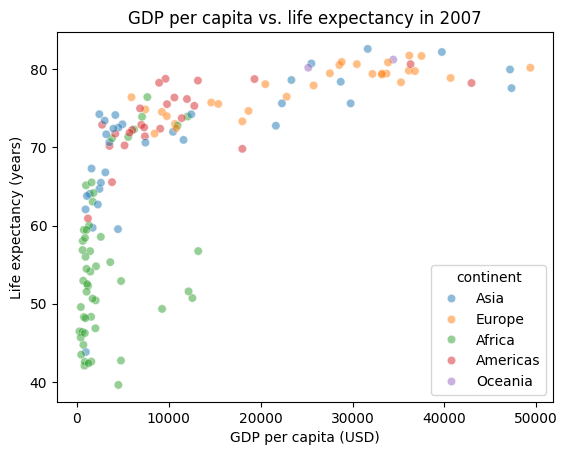

In [5]:
# The alpha parameter controls the transparency of the points, which is useful for seeing overlapping data.
sns.scatterplot(data=gapminder_2007_df, x="gdpPercap", y="lifeExp", hue="continent", alpha=0.5)
plt.title("GDP per capita vs. life expectancy in 2007")
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life expectancy (years)")
plt.show()

This pattern of passing in a dataframe via `data`, specifying the columns to plot via `x` and `y` is common across seaborn functions.

**1.2.** Generate a [sns.lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot) of life expectancy over time for three countries of your choice, where the lines are colored by country.

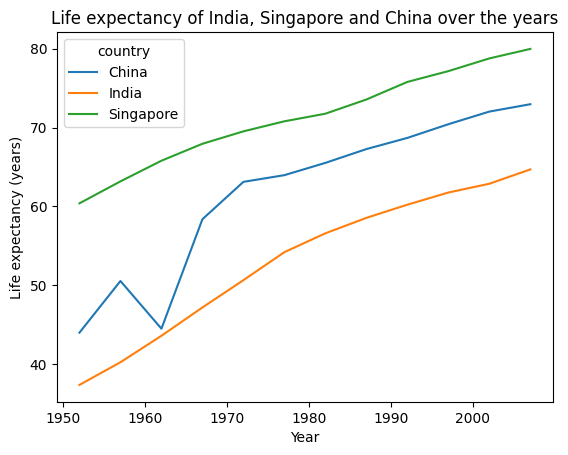

In [6]:
# three countries to plot
countries = ['India','Singapore','China']
gapminder_life_exp = gapminder_df[gapminder_df["country"].isin(countries)]

sns.lineplot(data=gapminder_life_exp, x="year", y="lifeExp", hue="country")
plt.title("Life expectancy of India, Singapore and China over the years")
plt.xlabel("Year")
plt.ylabel("Life expectancy (years)")
plt.show()

We'll also frequently visualize the shape or distribution of a variable through histograms or kernel density estimates (kde plots). Seaborn again provides convenient functions for this.

Let's again look at the 2007 data, but now examine the distribution of life expectancy for three continents through a [sns.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html). Here the y-axis will be the frequency of data points in a discrete number of bins. Experiment with the `bins` parameter, which controls the number of bins to use in the histogram, to see how it affects the ease of visualizing the different distributions.

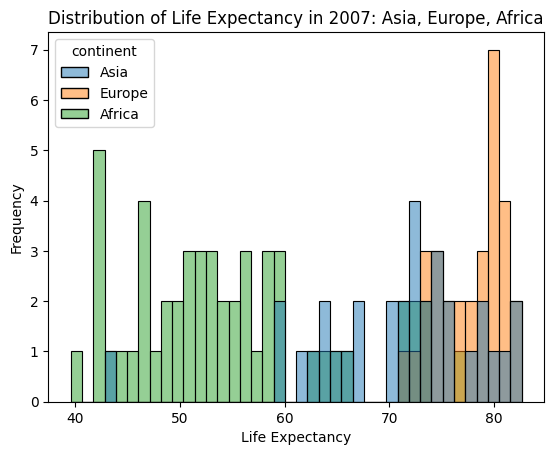

In [21]:

continent_2007_df = gapminder_2007_df[gapminder_2007_df['continent'].isin(['Asia', 'Europe', 'Africa'])]
# Notes that we only need to specify the x parameter, as the y-axis data count
# Do different settings make it easier or harder to see the shape of the distribution?
sns.histplot(data=continent_2007_df, x="lifeExp", hue="continent", bins=40)
plt.title("Distribution of Life Expectancy in 2007: Asia, Europe, Africa")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.show()

It is a little difficult to see the shape of the distribution with the bins overlaid on top of each other, so let's use a [sns.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to produce an another view on the data. KDE plots visualize the distribution of observations, much like a histogram, but apply a smoothing transformation to make the shape of the distribution easier to see. 


**1.3.** Create a kde plot for the life expectancy of the three continents below, using the same parameters as the histogram above, except omit the `bins` parameter:

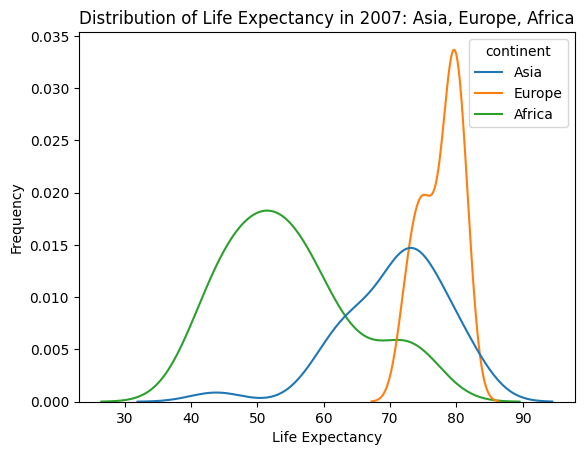

In [8]:
sns.kdeplot(data=continent_2007_df, x="lifeExp", hue="continent")
plt.title("Distribution of Life Expectancy in 2007: Asia, Europe, Africa")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.show()

**1.4.** Briefly describe differences that you observe between the distributions of life expectancy for the three continents. Some questions to consider:

- Around what values are the peaks of the distributions (central tendency)?
- Do some of the distributions seem more or less spread out than others (variability)?
- Do any of the distributions seem to have multiple peaks (multimodality)?
- Do any of the distributions seem to have "tails" where there are fewer observations at relatively extreme values for the continent?

**Your Response**: Varies, but the peaks of the dsitrubution for Asia, Europe and Africa are at ~72 years, ~80 years, and ~50 years respectively. The distributions for Africa and Asia are much more spread out than Europe and thus have more variability. The distributions for Africa and Europe show smaller local peaks as well. The distribution for Europe has very few observations for extreme values for the continent.

**1.5** We've explored two of the three types of [plotting functions](https://seaborn.pydata.org/tutorial.html#plotting-functions) that seaborn provides:

- [Visualizing statistical relationships](https://seaborn.pydata.org/tutorial/relational.html)
- [Visualizing distributions of data](https://seaborn.pydata.org/tutorial/distributions.html)

Let's now explore the third type of plotting function in an more open-ended way. Pick a seaborn plotting function that can be used to visualize categorical data, linked below:

- [Visualizing categorical data](https://seaborn.pydata.org/tutorial/categorical.html)

In your response, briefly describe the functionality of the plotting function you chose, and give an **descriptive** question that you could answer with the plot. Then, generate a plot of your choice using the function, and describe what the plot is revealing about the data.

- Categorical variables in the dataset:
    - `country`
    - `continent`
    - `year` (can be used as a categorical variable, depending on the question we want to ask!)

- Continuous variables in the dataset:
    - `lifeExp` 
    - `pop` 
    - `gdpPercap` 

**Your Response**: Varies!

# 2. The bootstrap technique [1 pt]

Here, we'll explore the bootstrap technique, which is a powerful technique for helping us quantify uncertainty in any **estimates** we produce from our data.

The goal whenever we're producing an estimate from our data is to learn something about the underyling population from which our data was sampled. These statistics, like the estimated expectations we've been calculating, tell us something about the population. For example, suppose we're healthcare policy analysts trying to understand the average cholesterol levels in the US adult population. In an ideal world, we would measure the cholesterol level of every person in the US -- but that is not practical. Instead, we collect a smaller sample of people, and calculate the average cholesterol level in our sample. Here, we'll be re-using the NHANES dataset from last worksheet as our cholesterol sample:

In [9]:
from nhanes.load import load_NHANES_data

nhanes_df = load_NHANES_data()

# filter to adults, and only include those with a valid cholesterol measurement
cholesterol_df = nhanes_df[nhanes_df['AgeInYearsAtScreening'] >= 18]
cholesterol_df = cholesterol_df[cholesterol_df['TotalCholesterolMgdl'].notna()][['TotalCholesterolMgdl']]

cholesterol_df.shape

(5176, 1)

Since our sample of roughly 5,000 people is just one of many different samples that could have been collected, there will be some variability in the estimates we get from different samples. We'd like to quantify this variability to understand how much uncertainty there is in our estimate.

The problem is that we only have one sample. As a thought experiment however, we can imagine running our data collection process many times, each time collecting a sample of the same size from the same population. Then, we could calculate the estimate we're interested in -- here, the mean cholesterol level in U.S. adults -- for each of these samples, and look at the distribution of these estimates. This distribution of estimates is called the **sampling distribution** of the estimate, and the shape of the sampling distribution tells us about the uncertainty in our estimate.

This thought experiment is where the bootstrap technique comes in. The bootstrap helps us understand how much our estimates might vary if we had collected different samples from the same population. To do this, we use the following procedure:

1. We treat our sample as if it represents the whole population
2. We create many new **bootstrap samples** by randomly selecting from our data **with replacement** (e.g. the same observation can be selected multiple times)
3. For each bootstrap sample, we calculate our estimate of interest (e.g. the mean cholesterol level)
4. By looking at how this estimate varies across our bootstrap samples, we can estimate our uncertainty.

As long as we generate enough bootstrap samples (which we can easily do with our modern simulation tools and computing power), the bootstrap sampling distribution will give us a good approximation of the true sampling distribution of the estimate. Let's begin by taking a look at the estimated expectation of cholesterol in our sample:

In [10]:
print(f"Average cholesterol in our sample: {cholesterol_df['TotalCholesterolMgdl'].mean():.1f} mg/dL")

Average cholesterol in our sample: 186.9 mg/dL


Next, we'll implement step 2 of the bootstrap technique above. Pandas has a convenient [df.sample method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) that we can use to generate bootstrap samples.

The following call will generate a single bootstrap sample of a dataframe:

```python
# frac=1 means we're generating a sample of the same size as the original dataframe
# replace=True means we're sampling with replacement
bootstrap_df = df.sample(frac=1, replace=True)
```

**2.1.** Complete the function below that generates bootstrap samples of a dataframe, returning them as a list:

In [11]:

def generate_bootstrap_dfs(df, n_bootstraps=5000):
    """
    Bootstraps the dataframe `n_bootstraps` times, where each bootstrap sample is the same number of rows as the original dataframe.

    Args:
        df (pd.DataFrame): the dataframe to bootstrap
        n_bootstraps (int): the number of bootstraps to generate

    Returns:
        list[pd.DataFrame]: a list of bootstrapped dataframes
    """
    bootstrap_dfs = []
    for i in range(n_bootstraps):
        bootstrap_df = df.sample(frac=1,replace=True)
        bootstrap_dfs.append(bootstrap_df)

    return bootstrap_dfs

# Create a simple dataframe to test
df = pd.DataFrame({'review_scores': [4, np.nan, 2, 3], 
                   'review_text': ['I liked it', 'It was awful', 'Bland', 'Pretty good']})

bootstrap_dfs = generate_bootstrap_dfs(df)
assert bootstrap_dfs[0].shape == df.shape, "Each bootstrap sample should be the same size as the original dataframe"

In [12]:
# Generate 5000 bootstrap samples of the cholesterol dataframe, may take 10-15 seconds to run
bootstrap_cholesterol_dfs = generate_bootstrap_dfs(cholesterol_df, n_bootstraps=5000)

**2.2.** Next, we'll perform step 3 of the bootstrap technique above, calculating the estimated expectation (mean) cholesterol level for each bootstrap sample:

In [13]:
def generate_bootstrap_means(bootstrap_dfs, column):
    """
    Calculates the mean of a column for each bootstrap sample in a list of dataframes.

    Args:
        bootstrap_dfs (list[pd.DataFrame]): a list of bootstrapped dataframes
        column (str): the column to calculate the mean of

    Returns:
        list[float]: a list of means (estimated expectations)
    """
    bootstrap_means = []
    for bootstrap_df in bootstrap_dfs:
        bootstrap_means.append(bootstrap_df[column].mean())
    return bootstrap_means



In [14]:

bootstrap_cholesterol_means = generate_bootstrap_means(bootstrap_cholesterol_dfs,'TotalCholesterolMgdl')


We can then visualize the shape of our bootstrap sampling distribution. Create a `sns.histplot` of the bootstrap means below, where the `x` parameter is the list of bootstrap means and the `kde` parameter is set to `True` to visualize the shape of the distribution:

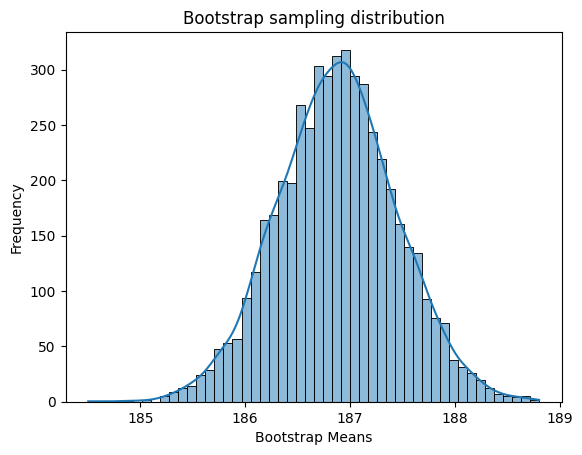

In [15]:
sns.histplot(data=bootstrap_cholesterol_means, kde=True)

plt.xlabel('Bootstrap Means')
plt.ylabel('Frequency')
plt.title('Bootstrap sampling distribution')
plt.show()

You'll notice that the sampling distribution is approximately bell-shaped (Normal distribution), which is a property of the bootstrap sampling distribution when the original sample is large and representative of the population. This then allows us to use the bootstrap sampling distribution to understand how much uncertainty there is in our estimate of average cholesterol level in the U.S. adult population. We can do this visually by inspecting the spread of the distribution above, and we can also quantify this by computing **confidence intervals** on our estimate.



You will typically see 95% confidence intervals reported in research papers. The 95% confidence interval tells us that if we repeated our sampling process many times and computed a 95% confidence interval each time, 95% of those intervals would contain the true population average cholesterol level.

**2.3**. To compute the 95% confidence interval, we can take the 2.5th and 97.5th percentiles of the bootstrap sampling distribution via [np.percentile](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html). Determine the 2.5th and 97.5th percentiles of the bootstrap cholesterol means below, using the `a` and `q` parameters of `np.percentile`:


In [16]:

# NOTE: the percentile function takes percentiles in the range [0, 100], not fractions
lower_ci = np.percentile(bootstrap_cholesterol_means, 2.5)
upper_ci = np.percentile(bootstrap_cholesterol_means, 97.5)

print(f"Average cholesterol level in U.S. adults: {cholesterol_df['TotalCholesterolMgdl'].mean():.1f} mg/dL")
print(f"95% Confidence Interval: [{lower_ci:.1f}, {upper_ci:.1f}] mg/dL")

Average cholesterol level in U.S. adults: 186.9 mg/dL
95% Confidence Interval: [185.8, 188.0] mg/dL


The narrower the confidence interval, the more precise our estimate is (decreased uncertainty and variance). One secondary goal we have when designing and analyzing studies is to make our estimates as precise as possible. The most straightforward way to do this is to increase our sample size -- but collecting more data is not often not practical! We'll explore how sample size affects the precision of our estimates in the next section.

:::{admonition} Takeaways
:class: note

The bootstrap is a powerful technique that helps us understand uncertainty in our estimates by simulating what would happen if we could collect many different samples from the population:

- Instead of collecting new samples (which is often not possible), we create new samples by resampling from our existing data
- By looking at how our estimates vary across these bootstrap samples, we can understand how much uncertainty exists in our original estimate
- This gives us practical tools like confidence intervals without requiring complex mathematical derivations
- The wider the range of values we see in our bootstrap samples, the more uncertainty we have in our estimate

This is just a high-level overview of the bootstrap for the purposes of this course, and we've skipped over many theoretical properties and details. If you're interested in learning more, let me know and I can recommend some resources!
:::

# 3. Adding interactivity [1 pt]

In this section, we'll learn how to make our visualizations interactive using `ipywidgets`. These dynamic widgets can help us build intuition about how different parameters affect our analysis.

The `ipywidgets` library functionality is extensive, but for our visualizations it will be sufficient for us to use the `interact`/`interact_manual` decorators to add interactivity without too much extra code. Read about the interact functionality below, focusing on the first three sections: "Basic `interact`," "Fixing arguments using `fixed`", and "Widget abbreviations".

- [Using Interact](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html)

:::{admonition} Reading Notes
:class: note

- I suggest reading the "Basic `interact`," "Fixing arguments using `fixed`", and "Widget abbreviations" sections, and leaving the rest for reference as they contain extra functionality that aren't as relevant to our purposes.

- `interact_manual` behaves the exact same way as `interact`, except that it requires the user to manually update the widget value by clicking on it. In all the examples below, we'll use `interact_manual` so that the widget values are not updated automatically as we change the parameters.

- The most concise usage of `interact`/`interact_manual` is to use them as decorators, which will automatically create a widget for each parameter in the function. You can read more about Python decorators at [this link](https://www.learnpython.org/en/Decorators), but for our purposes it is sufficient to know that we can use them to add interactivity to our functions by mirroring the parameter names in our plotting functions.

:::


In [17]:
# standard imports for ipywidgets
from ipywidgets import interact, interact_manual, fixed
import ipywidgets as widgets

Let's now use the `interact_manual` decorator to add interactivity to our bootstrap exploration. The parameters passed to the decorator will provide a dropdown menu for each parameter in the function in the widget, which you can see in the examplewidget below:

In [18]:
# generate a list of sample fractions to use for the dropdown menu
sample_fracs = [0.2, 0.4, 0.6, 0.8, 1.0]

# the parameter name in the function is the same as the parameter name in the decorator
@interact_manual(sample_frac=sample_fracs)
def print_subsample_mean(sample_frac):
    print(f"Calculating mean cholesterol of a random subsample of {int(sample_frac*cholesterol_df.shape[0])} people")

    subsample = cholesterol_df.sample(frac=sample_frac)

    print(f"Average cholesterol level in U.S. adults: {subsample['TotalCholesterolMgdl'].mean():.2f} mg/dL")

interactive(children=(Dropdown(description='sample_frac', options=(0.2, 0.4, 0.6, 0.8, 1.0), value=0.2), Butto…

**3.1** Complete the function below that displays the bootstrap sampling distribution of cholesterol levels for a given sample fraction. How does the spread of the sampling distribution change as we change the sample size? Do our estimates become more or less precise as we increase the sample size?

**Your Response**: Larger sample sizes lead to more precise estimates -- generally, there is a tradeoff between the amount of data we can feasibly collect and the precision of our estimates.

In [19]:
@interact_manual(sample_frac=sample_fracs)
def plot_bootstrap_sampling_distribution(sample_frac):

    print(f"Calculating mean cholesterol from a subsample of {int(sample_frac*cholesterol_df.shape[0])} people")

    # subsample the cholesterol dataframe
    subsample_df = cholesterol_df.sample(frac=sample_frac)

    # generate bootstrap samples from the subsampled dataframe
    # NOTE: you can use n_bootstraps=1000 to speed up the simulation
    bootstrap_dfs = generate_bootstrap_dfs(subsample_df, n_bootstraps=1000)

    # calculate the bootstrap means
    bootstrap_cholesterol_means = generate_bootstrap_means(bootstrap_dfs, column='TotalCholesterolMgdl')

    # Print the subsample mean and confidence interval
    lower_ci = np.percentile(bootstrap_cholesterol_means, 2.5)
    upper_ci = np.percentile(bootstrap_cholesterol_means, 97.5)
    print(f"Average cholesterol level in U.S. adults: {subsample_df['TotalCholesterolMgdl'].mean():.2f} mg/dL")
    print(f"95% Confidence Interval: [{lower_ci:.1f}, {upper_ci:.1f}] mg/dL")

    # plot the bootstrap sampling distribution using sns.histplot
    sns.histplot(bootstrap_cholesterol_means, kde=True, bins=15)
    plt.xlabel("Mean Cholesterol (mg/dL)")
    plt.ylabel("Frequency")
    plt.title("Bootstrap Sampling Distribution of Mean Cholesterol")
    
    # NOTE: this fixes the x-axis limits to be the same for all plots, making it easier to compare
    plt.xlim(182, 192)
    plt.show()


interactive(children=(Dropdown(description='sample_frac', options=(0.2, 0.4, 0.6, 0.8, 1.0), value=0.2), Butto…

**3.2.** Next, let's add interactivity to one of the gapminder plots we created earlier. Select one of the plots we created in question 1 and add interactivity with two parameters to your widget: 

- `sns.scatterplot`
- `sns.lineplot`
- `sns.histplot`
- `sns.kdeplot`


Some suggested parameters for `interact_manual` are listed given below as well. Describe your choices for the parameters and state a **descriptive** question that your widget can help answer. For example, "How does the relationship between GDP and life expectancy vary across the two selected countries in the year 2007?"

**Your Response**: Varies, but the example below explores how life expectancy varies across different continents in the year 2007.

In [20]:
continents = gapminder_df['continent'].unique()

@interact_manual(param1=continents)
def interactive_gapminder_plot(param1):
    # Filtering data
    gapminder_2007 = gapminder_df[(gapminder_df["year"] == 2007) & (gapminder_df["continent"] == param1)]
    
    sns.barplot(data=gapminder_2007, x="country", y="lifeExp")
    plt.title(f"Life Expectancy Across Countries in {param1} in 2007")
    plt.xlabel("Country")
    plt.ylabel("Life Expectancy (years)")
    plt.xticks(rotation=90)
    plt.show()

interactive(children=(Dropdown(description='param1', options=('Asia', 'Europe', 'Africa', 'Americas', 'Oceania…

# 4. Causal roadmap: Cintron et al. 2021 [1 pt]

Read ["A Roadmap for Causal Inference" by Cintron et al. 2021](https://www.evidenceforaction.org/roadmap-causal-inference) and answer the following questions:

:::{admonition} Reading notes

- Note on how the steps of the causal roadmap are broken out a bit more granularly than we've been discussing in class:
    - Their steps 1-2 are our "prior knowledge" step
    - Their step 3 is our "question" step
    - Their steps 4-5 are our "design" step

- The key identification statement is at the end of step 1: 

> A critical component of the assumed causal model is that neighborhoods receiving greening were selected effectively randomly from among those that were eligible for the program; eligibility was determined by the average income of neighborhood residents; and receiving greening was otherwise unrelated to characteristics of neighborhood residents.

- For a more technical walkthrough of the Causal Roadmap, see [Petersen and van der Laan 2015: Causal Models and Learning from Data](https://pmc.ncbi.nlm.nih.gov/articles/PMC4077670/)

:::

**4.1.** State what the measured treatment $T$ and outcome $Y$ are in the study -- be as specific as possible.

**Your Response**: The treatment is the level of greenness in a census block. The greening intervention was measured as a block that was in the lowest tertile in 2010 and the highest tertile in 2016. The outcome is the CVD risk ratio in the measured neighborhoods.

**4.2** Draw the causal graph that was detailed step 1 of the Causal Roadmap, with two of the their listed potential confounders present.

**Your Response**: Varies, but we examined an example DAG for the two confounders in Activity 4.

:::{admonition} Submission note
:class: tip

For this question, you can either hand-draw the graph on paper and submit a photo or use an online tool of your choice. Please make sure the image is submitted as a separate file on Gradescope.

:::

**4.3** Are there any potential confounders (either in the authors' list or ones you can think of) that may be difficult to measure?

**Your Response**: Varies, but everyone had good discussions on ethnicity, crime, and pollution (to name a few) which all can be difficult to measure in the context of this study.


**4.4** Looking towards the interpretation of the greenery study, what population would the results be applicable to? E.g. would it be generalizable to all neighborhoods in the United States, or would it be a more specific subset?

**Your Response**: Varies, but the results would be most applicable to low income neighborhoods in the Miami-Dade County. There would be some generalizability concerns to other neighborhoods in the United States, particularly those that look different demographically compared to Miami-Dade County. An open question in causal inference is how much causal effects measured "transfers" to other populations.

# 5. Reflection [0.5 pts]

**5.1** How much time outside of class did it take you to complete this worksheet?

**Your Response**: Varies

**5.2** What is one thing you have a better understanding of after completing this worksheet? This could be about the concepts, the reading, or the code.

**Your Response**: Varies

**5.3** What questions or points of confusion do you have about the material covered in this worksheet?

**Your Response**: Varies

# Acknowledgements

- Free data from World Bank via Gapminder.org, [CC-BY-4.0 license](https://www.gapminder.org/free-material/). Read more at https://www.gapminder.org/data/
- Gapminder data cleaned and organized via the [causaldata](https://github.com/causaldata) package, produced by Nick Huntington-Klein.
- Intuition for explaining the bootstrap from Zach Duey's blog post, [Applying Nonparametric Bootstrap](https://zduey.github.io/posts/applying-nonparametric-bootstrap.html)